# import 및 데이터불러오기

In [ ]:
import pandas as pd
import numpy as np

## 난수 발생을 위한 패키지
import random
## 그래프 표현을 위해 필요한 패키지
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# 한글 호환 문제
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm

!sudo apt-get install -y fonts-nanum

# 폰트 캐시 재설정
!sudo fc-cache -fv

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name


Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(연식 평균 컬럼 추가).csv', encoding='cp949')
df.set_index('동', drop=True, inplace=True)
df.head()

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,13.940659,20.914235,6.0,20200810.0,2020,8,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,748.978665
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1396.825397
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2997.981157
원효로2가,1.0,13.940659,20.914235,4.0,20200210.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3031.062124
원효로2가,2.0,13.940659,20.914235,5.0,20200111.0,2020,1,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1902.358898


# LGBM

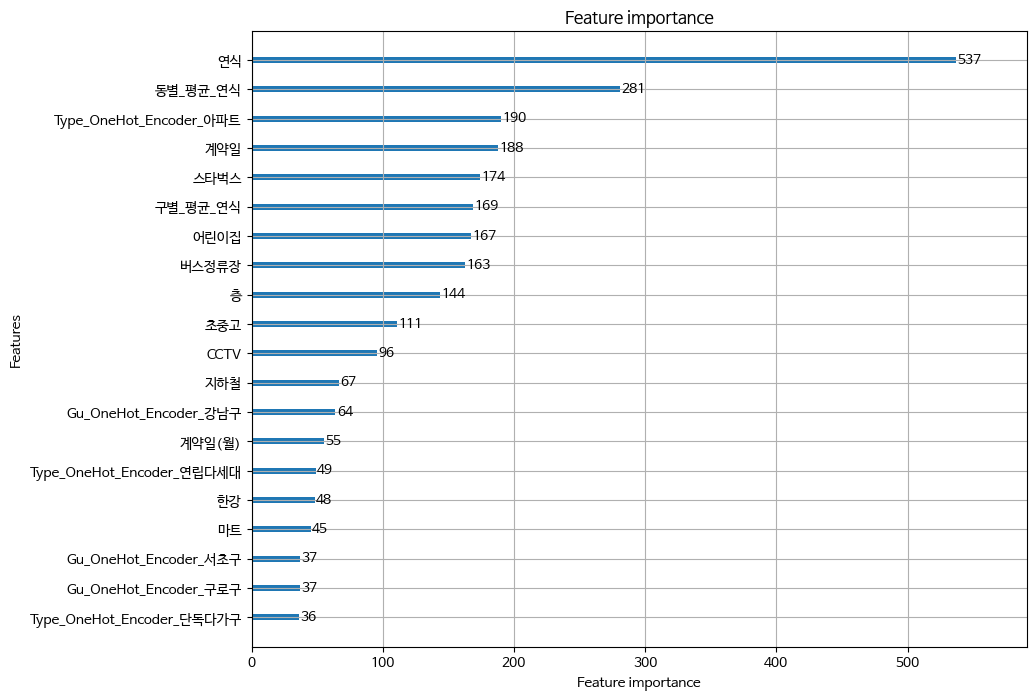

In [ ]:
# lightgbm 학습
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features = df.iloc[:, :-1]
y_label = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

model = LGBMRegressor(max_depth=10, random_state=11, verbose=-1)
model.fit(X_train, y_train)

lgb.plot_importance(model, figsize=(10, 8), max_num_features=20)
plt.show()

Mean Absolute Error: 427.85173067100135
Mean Squared Error: 361571.970329881
Root Mean Squared Error: 601.3085483592272
Mean Squared Log Error: 0.13940736381000554
R Squared: 0.6602413176903164
Mean Absolute Percentage Error: 32.21016347691032
Mean Percentage Error: -16.09146132237656
              실제값          예측값
동                             
가락동   2546.879958  2505.062228
가리봉동  1642.625283  1610.233922
가산동   2438.044269  2423.101851
가양동   1941.416840  1936.254539
가회동   1722.827903  1359.765993
...           ...          ...
효창동   2430.199235  2394.479867
후암동   1625.261842  1608.476737
휘경동   1872.946527  1843.304664
흑석동   2183.732827  2248.357075
흥인동   3024.263098  3029.525959

[394 rows x 2 columns]


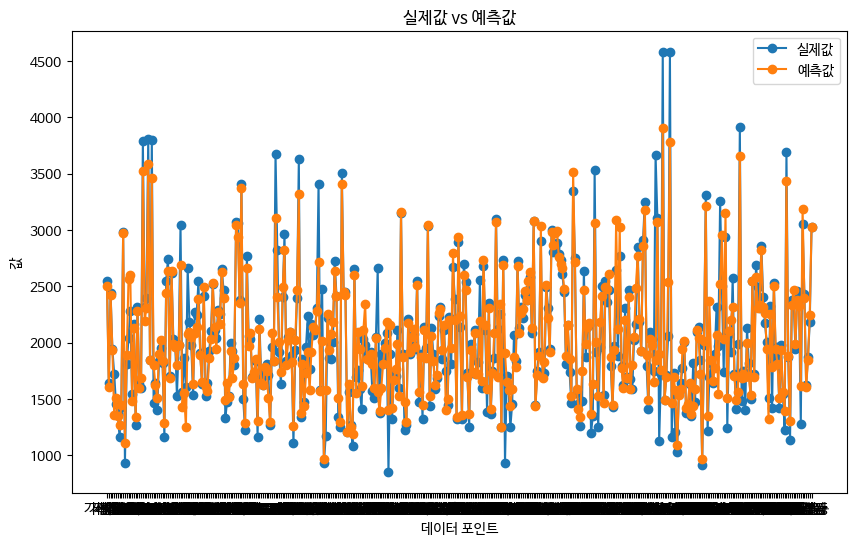

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

# 학습된 모델을 사용하여 예측
y_pred = model.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

## 하이퍼파라미터 튜닝

In [ ]:
# RandomizedSearchCV(하이퍼파라미터 튜닝)
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators' : [100, 500 , 1000] , # 반복 횟수
    'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
    'lambda_l1' : [0 , 10 , 20 , 30 ,50] , # L1 정규화
    'lambda_l2' : [0 , 10 , 20 , 30 , 50] , # L2 정규화
    'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
    'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
}

model_2 = LGBMRegressor(random_state= 11) # 모델 객체 생성
rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30, random_state= 11 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성
rs.fit(X_train , y_train)
rs.best_params_

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.155492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

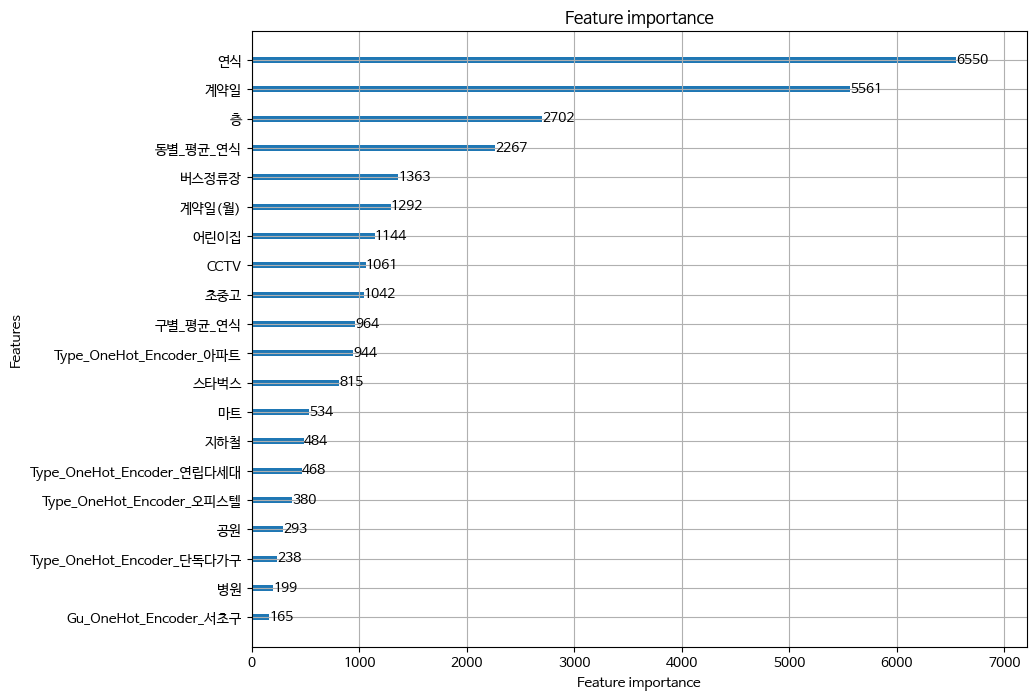

In [ ]:
# 최적화된 하이퍼파라미터 적용
model_best = LGBMRegressor(subsample=0.6,
                          n_estimators=1000,
                          max_depth=20,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          random_state=11)
model_best.fit(X_train, y_train)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20)
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 382.7752914941385
Mean Squared Error: 293436.1917060491
Root Mean Squared Error: 541.6975094146632
Mean Squared Log Error: 0.12001093144638827
R Squared: 0.7242665305469899
Mean Absolute Percentage Error: 28.809889803086175
Mean Percentage Error: -13.626271131069107
              실제값          예측값
동                             
가락동   2546.879958  2558.929972
가리봉동  1642.625283  1617.623410
가산동   2438.044269  2433.999818
가양동   1941.416840  1928.925107
가회동   1722.827903  1518.435909
...           ...          ...
효창동   2430.199235  2460.630588
후암동   1625.261842  1611.058841
휘경동   1872.946527  1861.142703
흑석동   2183.732827  2260.373773
흥인동   3

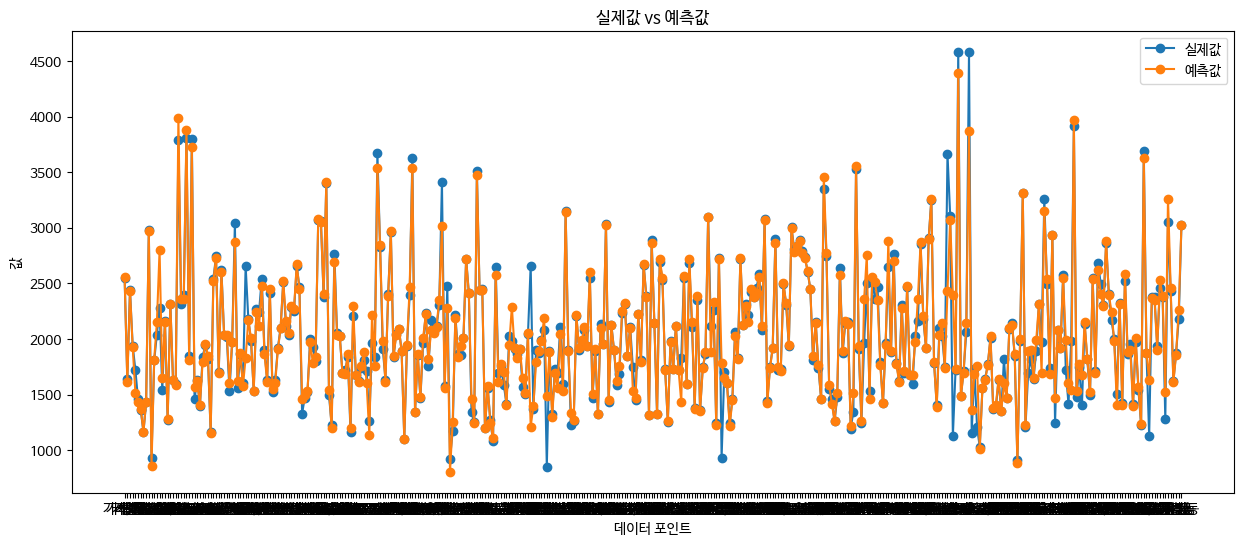

In [ ]:
# 학습된 모델을 사용하여 예측
y_pred = model_best.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(15, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

# Log변환

## 데이터 불러오기

In [ ]:
df_log = pd.read_csv("/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(로그변환).csv", encoding='cp949')
df_log.set_index('동', drop=True, inplace=True)
df_log.head(3)

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,로그전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,13.940659,20.914235,6.0,20200810.0,2020,8,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.620045
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.242673
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.006028


## LGBM

In [ ]:
# lightgbm 학습
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features_log = df_log.iloc[:, :-1]
y_label_log = df_log.iloc[:, -1]
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_features_log, y_label_log, test_size=0.2, random_state=156)

## 하이퍼파라미터 튜닝

In [ ]:
# RandomizedSearchCV(하이퍼파라미터 튜닝)
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators' : [100, 500 , 1000] , # 반복 횟수
    'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
    'lambda_l1' : [0 , 10 , 20 , 30 ,50] , # L1 정규화
    'lambda_l2' : [0 , 10 , 20 , 30 , 50] , # L2 정규화
    'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
    'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
}

model_2 = LGBMRegressor(random_state= 11) # 모델 객체 생성
rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30, random_state= 11 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성
rs.fit(X_train_log, y_train_log)
rs.best_params_

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.161824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

{'subsample': 0.6,
 'n_estimators': 1000,
 'max_depth': 20,
 'learning_rate': 0.3,
 'lambda_l2': 30,
 'lambda_l1': 10}

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.229976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

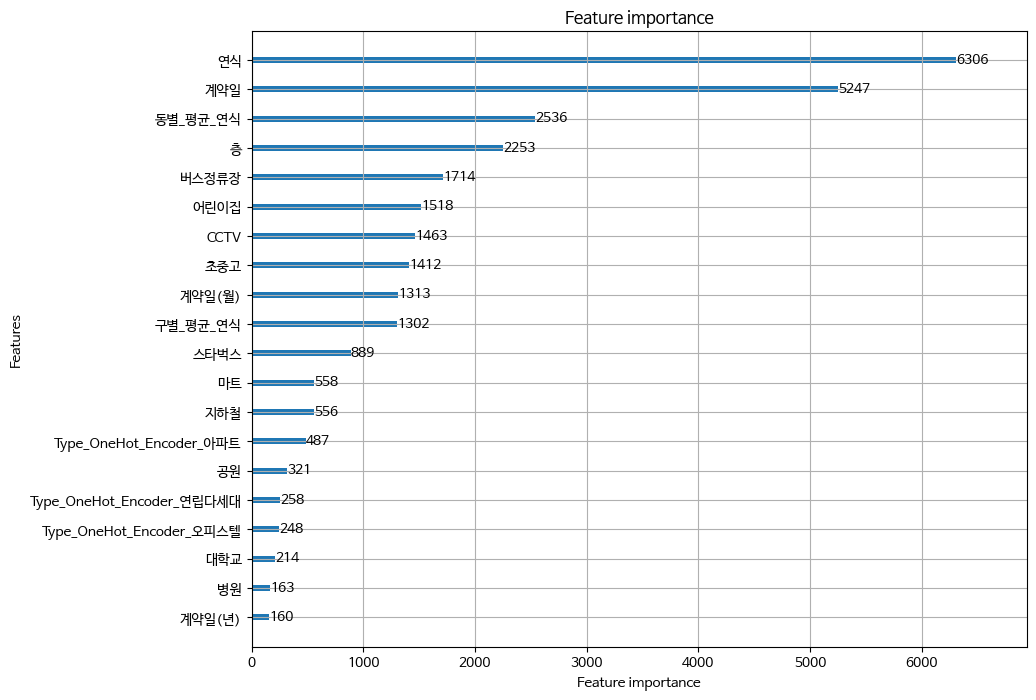

In [ ]:
# 최적화된 하이퍼파라미터 적용
model_best = LGBMRegressor(subsample=0.6,
                          n_estimators=1000,
                          max_depth=20,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          random_state=11)
model_best.fit(X_train_log, y_train_log)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20)
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 392.82696102449825
Mean Squared Error: 314445.2113379689
Root Mean Squared Error: 560.7541451812629
Mean Squared Log Error: 0.11547407258377931
R Squared: 0.704524964793851
Mean Absolute Percentage Error: 27.098184080922373
Mean Percentage Error: -7.587923109489073
              실제값          예측값
동                             
가락동   2546.879958  2452.968683
가리봉동  1642.625283  1490.795797
가산동   2438.044269  2393.451110
가양동   1941.416840  1864.843421
가회동   1722.827903  1392.434898
...           ...          ...
효창동   2430.199235  2372.857213
후암동   1625.261842  1560.859022
휘경동   1872.946527  1774.955374
흑석동   2183.732827  2055.358498
흥인동   30

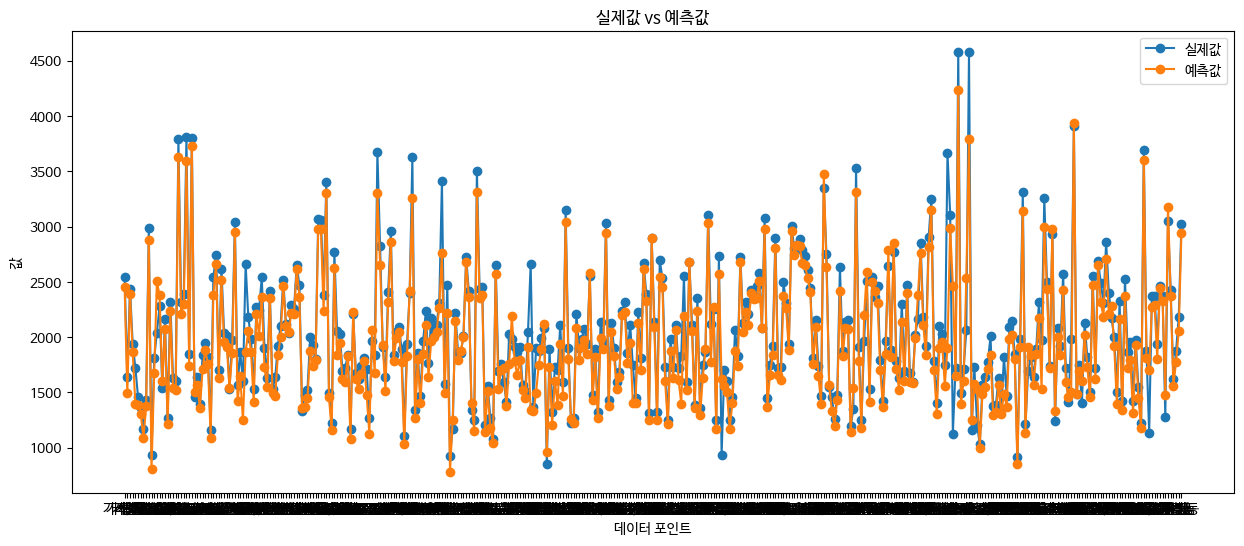

In [ ]:
# 학습된 모델을 사용하여 예측
y_pred_log = model_best.predict(X_test_log)
y_pred = np.expm1(y_pred_log)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(15, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()